# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

warnings.filterwarnings("ignore")

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_csv("salary_dataset.csv")

data

,age,experience,gpa,degree,position,salary
0,30.0,7.0,3.94,bachelor,engineer,32500.0
1,26.0,2.0,2.86,bachelor,NaN,22500.0
2,27.0,0.0,3.13,doctorate,secretary,37000.0
3,32.0,NaN,3.10,bachelor,engineer,24500.0
4,24.0,1.0,3.81,bachelor,accountant,23500.0
...,...,...,...,...,...,...
85,31.0,1.0,2.79,master,engineer,34000.0
86,NaN,5.0,3.27,doctorate,secretary,36000.0
87,28.0,7.0,2.64,doctorate,secretary,38000.0
88,26.0,1.0,2.52,bachelor,secretary,NaN


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,salary
count,86.000000,86.000000,86.000000,86.000000
mean,28.023256,3.848837,3.278605,31348.837209
std,4.408486,3.702201,0.528937,9255.227384
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.260000,30500.000000
75%,32.000000,7.000000,3.640000,37375.000000
max,35.000000,13.000000,5.880000,54000.000000


### 3.2.2. Remove Outliers

In [7]:
data = data[data["gpa"] <= 4]

# 4. Split Dataset into Training & Test Sets

In [8]:
target_name = "salary"
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [11]:
numerical_feature = ["age", "experience", "gpa"]
categorical_feature = ["degree", "position"]

In [12]:
for feature in categorical_feature:
    print(feature, ":", np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [13]:
ordinal_feature = ["degree"]
nominal_feature = ["position"]

In [14]:
np.unique(data["degree"])

array(['bachelor', 'doctorate', 'master'], dtype=object)

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [15]:
categories = [
    np.array(["bachelor", "master", "doctorate"], dtype=object),
]

In [16]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [17]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + "_" + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [20]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [21]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = LinearRegression()

## 6.2. Train Model

In [23]:
reg.fit(X_train, y_train)

LinearRegression()

## 6.3. Model's Weight & Bias

In [24]:
reg.coef_

array([  271.78182618,   933.35098831,  2975.49123238,  7229.06045798,
        -203.45604484,  2714.2842907 , -2510.82824587])

In [25]:
reg.intercept_

4839.338200109814

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [27]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [28]:
print("r2_score =\t\t\t", r2_score(y_train, y_pred_train))
print("mean_squared_error =\t\t", mean_squared_error(y_train, y_pred_train))
print("mean_absolute_error =\t\t", mean_absolute_error(y_train, y_pred_train))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_train, y_pred_train),
)

r2_score =			 0.8754363725417725
mean_squared_error =		 10644290.61601466
mean_absolute_error =		 2784.8375002570397
mean_absolute_percentage_error = 0.10034894426848144


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

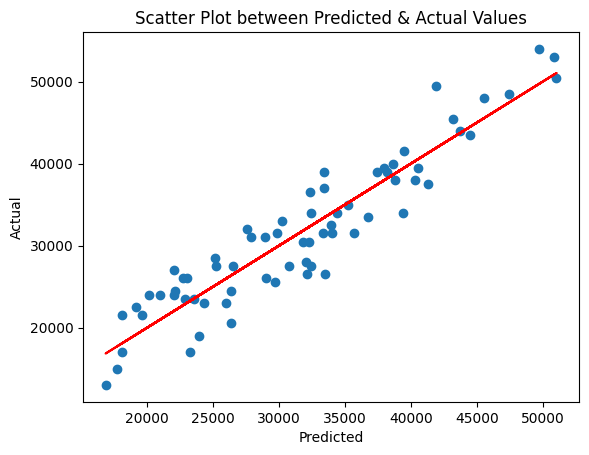

In [29]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color="red")

plt.title("Scatter Plot between Predicted & Actual Values")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## 8.2. Test Set

### 8.2.1. Scoring

In [30]:
print("r2_score =\t\t\t", r2_score(y_test, y_pred_test))
print("mean_squared_error =\t\t", mean_squared_error(y_test, y_pred_test))
print("mean_absolute_error =\t\t", mean_absolute_error(y_test, y_pred_test))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_test, y_pred_test),
)

r2_score =			 0.9193028838750403
mean_squared_error =		 6875589.753989433
mean_absolute_error =		 2114.6297272619554
mean_absolute_percentage_error = 0.07495001240387732


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

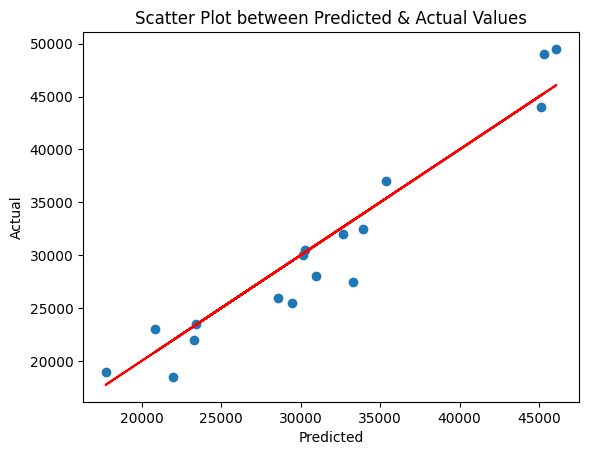

In [31]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color="red")

plt.title("Scatter Plot between Predicted & Actual Values")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 9. Save Model

In [32]:
import pickle

In [33]:
pickle.dump(
    (
        reg,
        ordinal_encoder,
        one_hot_encoder,
        feature_name,
        numerical_feature,
        ordinal_feature,
        nominal_feature,
    ),
    open("salary_model.pickle", "wb"),
)